# OpenAI Gym Virtual Rendering
Understanding and creating utilities for 3d RGB arrays. Particularly we want to convert these to images and allow for rendering them to notebooks. We also want to stack these images to create videos.

In [34]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

### Environment
Create an OpenAI environment that produces an RGB array as an observation space.

In [35]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

Observe that the observation space is a 3D array. Height x Width x RGB.

In [36]:
env.observation_space.shape

(240, 256, 3)

Get the initial observation which should be good enough for this example.

In [37]:
observation = env.reset()

observation.shape

(240, 256, 3)

### Image Conversion

Import imaging utilities.

In [38]:
%run ./fa.intelligence.notebooks/utilities/common/imaging.ipynb

In [39]:
initial_observation = rgb_array_to_image(observation)

Render the image of the initial observation.

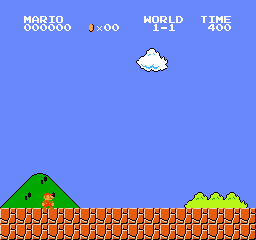

In [40]:
initial_observation

Render a gif containing X count of random steps taken in the environment.

In [41]:
step_images = []
steps_to_record = 100
done = False

step_images.append(initial_observation)

for step_index in range(steps_to_record - 1):
    state, reward, done, info = env.step(env.action_space.sample())
    state_render = rgb_array_to_image(state)
    
    step_images.append(state_render)
    
gif_bytes = images_to_gif_bytes(step_images)

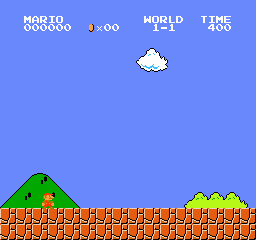

In [42]:
from IPython.display import Image, HTML

Image(gif_bytes)

HTML custom render for results.

In [43]:
import base64

In [44]:
experiment_name = 'OpenAI Mario RL Agent Training Results'

# Test data.
episodes = [gif_bytes, gif_bytes]
style = '.footer{ padding: 15px } .center{ text-align:center } .episode-container{ display: inline-block; padding: 15px } .epi-title{ font-weight:bold } .epi-gif{ padding: 5px }'
episodes_html = ''.join([ f'<div class="episode-container"><div class="epi-title">Ep X</div><div class="epi-gif"><img src="data:image.gif;base64, {base64.b64encode(gif_bytes).decode()}" /></div><div>Reward: 0.00</div></div>' for e in episodes ])

HTML(f'<style>{style}</style><h1 class="center">{experiment_name}</h1><div class="center">{episodes_html}</div><div class="center footer">FrostAura Intelligence</div>')